<a href="https://colab.research.google.com/github/javierexe/predicciones-de-ventas/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto 1

##Parte 1

###Diccionario de datos para este conjunto de datos:

|Nombre de la variable| Descripción                                  |
|---------------------|----------------------------------------------|
|Item_Identifier|Identificación única del producto|
|Item_Weight|Peso del producto|
|Item_Fat_Content|Si el producto es bajo en grasa o regular
|Item_Visibility|Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto
|Item_Type|Categoría a la que el producto pertenece
|Item_MRP|Precio máximo de venta al público (precio de catálogo) del producto
|Outlet_Identifier|Identificación única de la tienda
|Outlet_Establishment_Year|El año en que se estableció la tienda
|Outlet_Size|El tamaño de la tienda en cuanto al área total
|Outlet_Location_Type|El tipo de área donde se encuentra la tienda
|Outlet_Type|Si el punto de venta es una tienda de comestibles o algún tipo de supermercado
|Item_Outlet_Sales|Ventas del producto en una tienda particular. Es la variable objetivo a predecir.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [3]:
file = '/content/drive/MyDrive/Coding DOJO/files/sales_predictions_2023.csv'

###DataFrame

In [4]:
df = pd.read_csv(file)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Parte 2

###1) ¿Cuántas filas y columnas?

In [5]:
df.shape
print('RESPUESTA 1: Hay 8.523 filas y 12 columnas')

RESPUESTA 1: Hay 8.523 filas y 12 columnas


###2) ¿Cuáles son los tipos de datos en cada variable?

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.


In [7]:
print(df[df.duplicated()].count())
print('\nRESPUESTA 3: No hay valores duplicados')

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

RESPUESTA 3: No hay valores duplicados


###4) Identifiquen los valores faltantes.

In [8]:
#columnas totales - columnas con valores faltantes (NaN)
falt_IW = len(df)-df['Item_Weight'].count()
falt_OS = len(df)-df['Outlet_Size'].count()
print('RESPUESTA 4:\n')
print(f'En la columna Item_Weight faltan {falt_IW} valores')
print(f'En la columna Outlet_Size faltan {falt_OS} valores')

RESPUESTA 4:

En la columna Item_Weight faltan 1463 valores
En la columna Outlet_Size faltan 2410 valores


In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

###5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).


In [10]:
df.groupby('Item_Identifier')['Item_Weight'].value_counts(dropna=False)   #https://stackoverflow.com/questions/68154806/value-counts-to-count-nans-in-a-dataframe

Item_Identifier  Item_Weight
DRA12            11.60          6
DRA24            19.35          5
                 NaN            2
DRA59            8.27           6
                 NaN            2
                               ..
NCZ42            10.50          5
NCZ53            9.60           4
                 NaN            1
NCZ54            14.65          5
                 NaN            2
Name: Item_Weight, Length: 2697, dtype: int64

Al recorrer el df se observa que el cada valor del identificador del producto ('Item_Identifier') siempre tiene el mismo peso, y valores en blanco.
Por lo tanto, la idea es rellenar los valores vacíos del peso, con el peso correspondiente de cada identificador

Obtenemos un df nuevo a partir del original, con las columnas 'Item_Identifier' e 'Item_Weight'. Dejamos sólo aquellas columnas que tengas valores de peso ('Item_Weight')

In [11]:
# el nuevo df lo llamaremos df_Item_ID_cp
df_Item_ID_cp = df[['Item_Identifier', 'Item_Weight']]
df_Item_ID = df_Item_ID_cp[df['Item_Weight'].notna()].drop_duplicates()

In [12]:
# combinamos ambos df (merge) para traer los pesos de cada item
df = pd.merge(df, df_Item_ID, on ='Item_Identifier', how ='left')
df

,Item_Identifier,Item_Weight_x,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_y
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


**Observación:** *aparecen dos columnas nuevas 'Item_Weight_x', que corresponde a 'Item_Weight' del df original e 'Item_Weight_y' que es la misma columna, pero esta vez proviene del* ***df_Item_ID_cp***

**Paso siguiente:** *utilizaremos el método '**df.where**' para rellenar los valores faltantes de 'Item_Weight_x' con el valor correspondiente de 'Item_Weight_y'*



In [13]:
df['Item_Weight_x'] = (df['Item_Weight_y']).where(df['Item_Weight_x'].isna(), df['Item_Weight_x'])

**Paso siguiente:** *hacemos los cambios para devolver el df a sus columnas originales*

In [14]:
# cambiamos de vuelta el nombre de la columna 'Item_Weight'
df.rename(columns={'Item_Weight_x': 'Item_Weight'}, inplace=True)

#borramos columna 'Item_Weight_y'
df.drop(columns='Item_Weight_y', inplace=True)

In [15]:
df[['Item_Weight', 'Outlet_Size']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  8519 non-null   float64
 1   Outlet_Size  6113 non-null   object 
dtypes: float64(1), object(1)
memory usage: 199.8+ KB


**Observación:** *aún tenemos 4 valores nulos en 'Item_Weight' que corresponden a items que no tenían peso.

**Paso siguiente:** *Como sólamente representan el 0,04% de las entradas totales de la columna, simplemente las eliminaremos. Utilizaremos el parámetro **subset** para eliminar sólo las filas con valores nulos de la columna 'Item_Weight'  

In [16]:
df.dropna(subset=['Item_Weight'], inplace=True)

Si revisamos las filas con valores nulos en la columna *Outlet_Size* veremos que estos sólo se encuentran en dos tipos de tiendas: *Grocery Store* y *Supermarket Type1*



In [17]:
df_filt=df.iloc[:,6:12]
df_filt=df['Outlet_Size'].isna()
df[df_filt]['Outlet_Type'].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

La tienda *Grocery Store* sólo tiene *'Small'* como valor para la columna *Outlet_Size* y lo mismo ocurre con la tienda del tipo *Supermarket Type1*

In [18]:
df['Outlet_Size'].loc[df['Outlet_Type'] == 'Grocery Store'].value_counts()

Small    527
Name: Outlet_Size, dtype: int64

In [19]:
df['Outlet_Size'].loc[(df['Outlet_Type'] == 'Supermarket Type1')&(df['Outlet_Location_Type'] == 'Tier 2')].value_counts()

Small    930
Name: Outlet_Size, dtype: int64

Por lo tanto, reemplazaremos todos los valores vacíos (NaN) por *'Small'*

In [20]:
df['Outlet_Size'].fillna('Small', inplace=True)

###6) Confirmen que no hay valores faltantes después de abordarlos.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                8519 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


###7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [22]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
#la columna 'Item_Fat_Content' pasó de tener 5 valores distintos a sólo 2.
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat','low fat': 'Low Fat','reg': 'Regular'})
df['Item_Fat_Content'].value_counts()

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

###8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [24]:
(df.select_dtypes(exclude = object).describe().round(1))

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.0,8519.0,8519.0,8519.0,8519.0
mean,12.9,0.1,141.0,1997.8,2181.2
std,4.6,0.1,62.3,8.4,1706.5
min,4.6,0.0,31.3,1985.0,33.3
25%,8.8,0.0,93.8,1987.0,834.2
50%,12.6,0.1,143.0,1999.0,1794.3
75%,16.8,0.1,185.7,2004.0,3100.6
max,21.4,0.3,266.9,2009.0,13087.0


##Parte 3

Continuaremos trabajando en el proyecto de predicción de ventas. El objetivo es ayudarlos a comprender los datos en relación con los productos y puntos de ventas que desempeñan un papel crucial en el aumento de ventas.

Para la tercera parte, la tarea es completar cualquier análisis estadístico que los puedan a ayudar a comprender, explicar o moldear sus datos. Esto debe incluir al menos uno de cada:

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



* Histograma para ver las distribuciones de diversas características en el conjunto de datos.









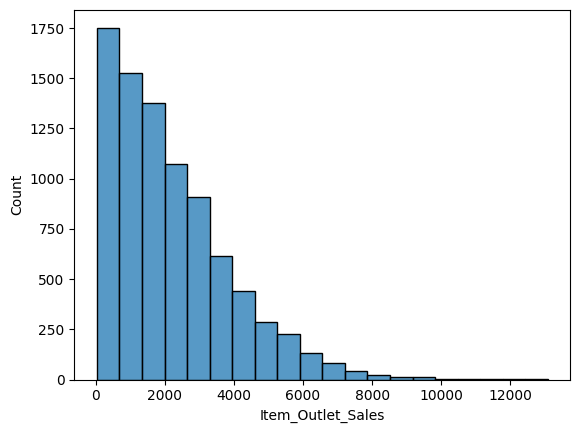

In [26]:
sns.histplot(data=df, x='Item_Outlet_Sales', bins=20);

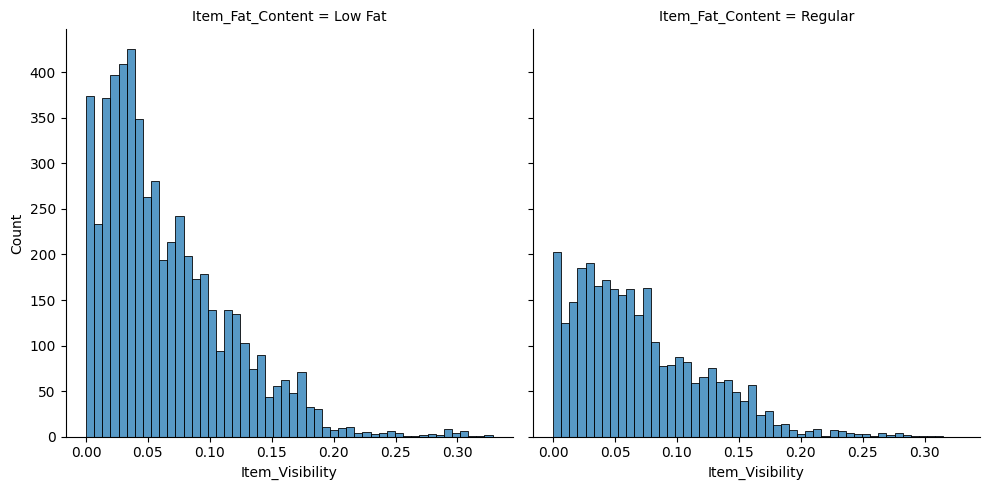

In [27]:
sns.displot(data=df, x='Item_Visibility', col='Item_Fat_Content');

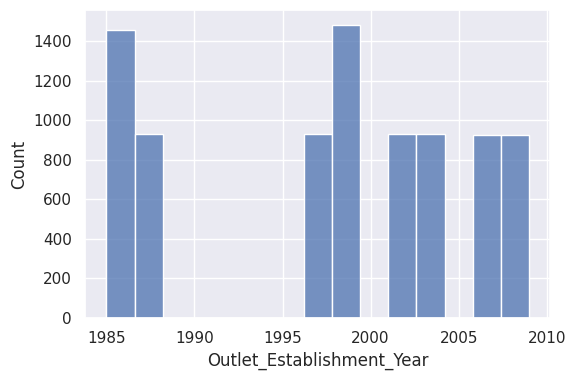

In [28]:
sns.set(rc = {"figure.figsize":(6,4)})
sns.histplot(data=df, x='Outlet_Establishment_Year');

* Boxplot para ver resúmenes estadísticos de diversas características en el conjunto de datos.

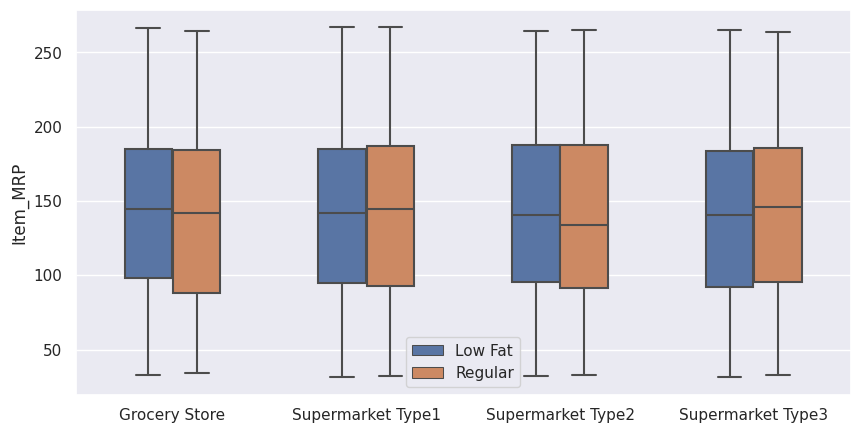

In [29]:
df_ord = df.sort_values('Outlet_Type')
sns.set(rc = {"figure.figsize":(10,5)})
sns.boxplot(df_ord, y='Item_MRP', x='Outlet_Type', hue='Item_Fat_Content', width=0.5)
plt.legend(loc='best')
plt.xlabel(None);

In [30]:
df['Item_Type'].unique()
df_alim = df[df.Item_Type.isin(['Soft Drinks','Dairy','Canned','Frozen Foods',
                                'Fruits and Vegetables','Snack Foods',
                                'Baking Goods','Starchy Foods','Meat',
                                'Seafood', 'Breakfast', 'Breads'])]

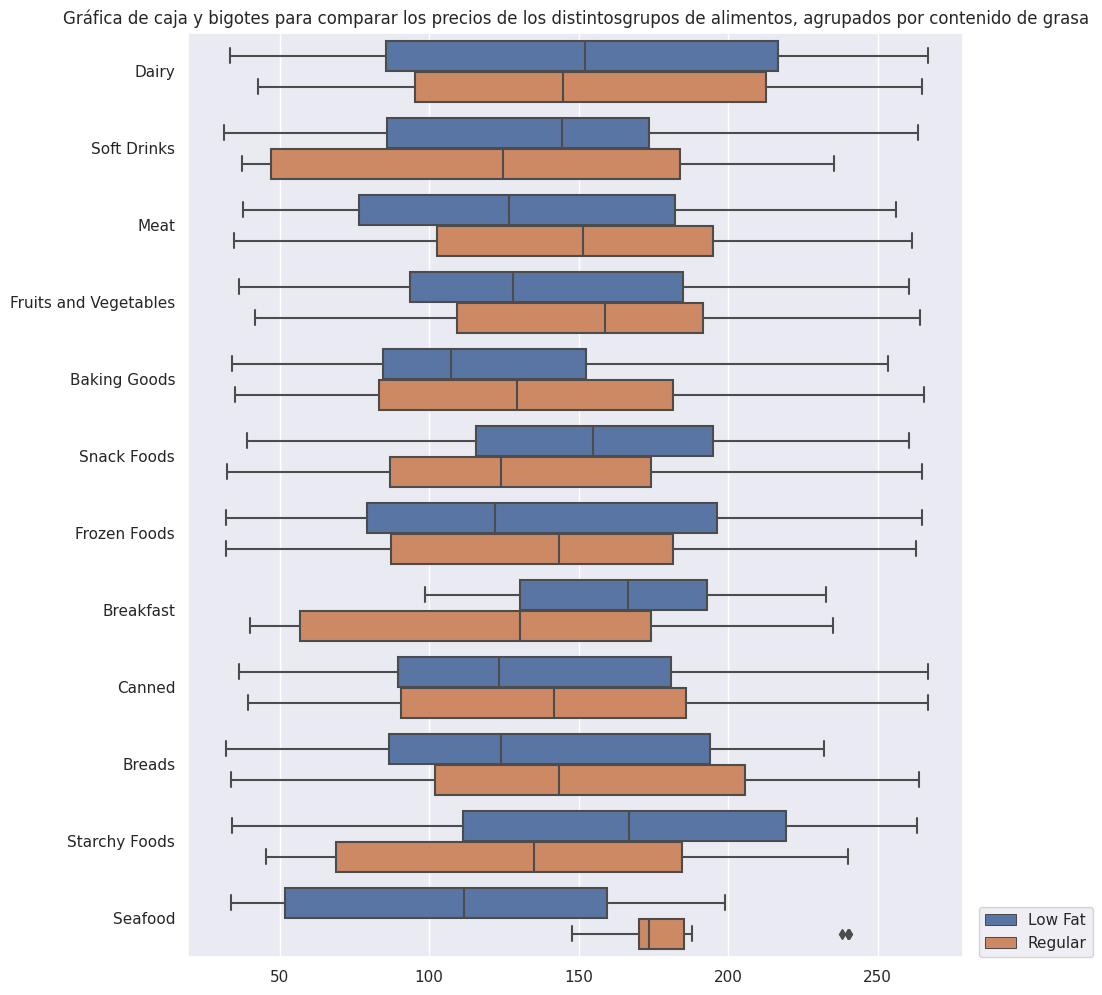

In [31]:
sns.set(rc = {"figure.figsize":(10,12)})
sns.boxplot(df_alim, x='Item_MRP', y='Item_Type', hue='Item_Fat_Content', width=0.8)
plt.legend(loc=(1.02, 0))
plt.xlabel(None, rotation=75);
plt.ylabel(None);
plt.title('Gráfica de caja y bigotes para comparar los precios de los distintos\
grupos de alimentos, agrupados por contenido de grasa');

* Mapa de calor de la correlación entre las características.


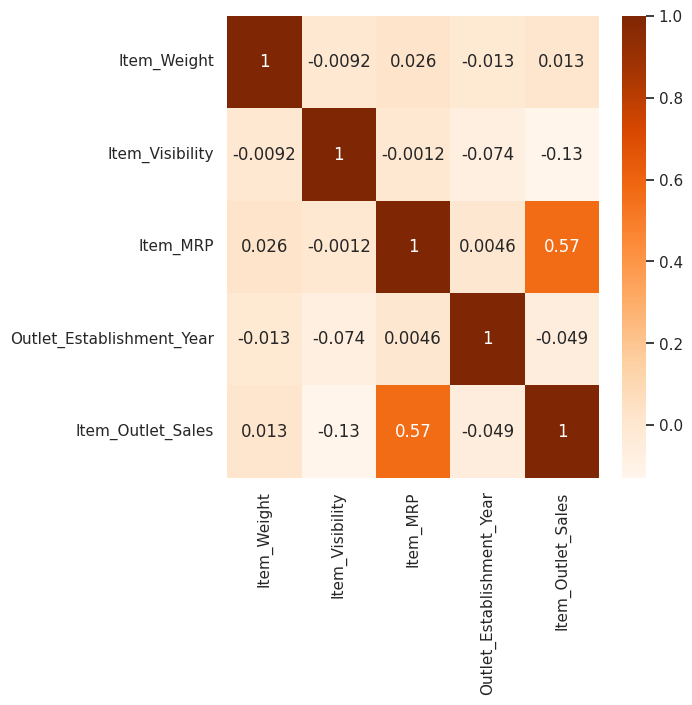

In [32]:
sns.set({"figure.figsize":(6,6)})
sns.heatmap(df.corr(numeric_only = True), annot=True, cmap='Oranges');
#El mapa de calor nos muestra que prácticamente no existe correlación
#entre las caracteristicas medibles de los productos, salvo entre
#Item MRP y Item Outlet Sales, que existe una correlación media.

# Parte 5
Para la parte 5, regresarán al conjunto de datos original con el objetivo de evitar una fuga de datos.  

Nota: Si imputaron los valores faltantes basados en un cálculo en todo el conjunto de datos (como la media), ahora deben realizar ese paso después de hacer train test split usando SimpleImputer.  

* Identifiquen el objetivo (X) y las características (y): Asignen la columna "Item_Outlet_Sales" somo el objetivo y el resto de las variables relevantes como el matriz de características.  
* Realicen un train test split
* Creen un pipeline de preprocesamiento para preparar el conjunto de datos para el aprendizaje automático.


#####Importamos librerías necesarias

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

#####Determinamos objetivo y características

In [34]:

y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')

####Realizamos train/test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

####Instanciamos selectores de columnas

In [36]:
cat_selec = make_column_selector(dtype_include='object')
num_selec = make_column_selector(dtype_include='number')

####Instanciamos los trasnformadores

In [37]:
# Imputadoresfreq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='constant', fill_value='small')
# Escalador
scaler = StandardScaler()
# Codificador One-hot
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

#### Instanciamos los pipelines

In [38]:
# pipeline numérico
num_pipe = make_pipeline(mean_imputer, scaler)

In [39]:
# pipeline categórico
cat_pipe = make_pipeline(freq_imputer, ohe)

####Instanciamos column transformer

In [40]:
# Tuples para Column Transformer
number_tuple = (num_pipe, num_selec)
category_tuple = (cat_pipe, cat_selec)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x791aa1732890>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='small',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x791aa1732dd0>)])

#### Transformarmos los datos

Ajustaremos el ColumnTransformer (“preprocessor”) en los datos de entrenamiento.

In [41]:
# fit on train
preprocessor.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x791aa1732890>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='small',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x791aa1732dd0>)])

In [42]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [48]:
import numpy as np
# Comprobamos los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6389, 1587)
